# Algebra Linear Algorítmica - 2022.1 - Projeto Final - Professor João Paixão
## Realizado por: David Rodrigues Albuquerque - 120047390

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans

Forma de separar a explicação do Colab:

- Apresentação do trabalho e objetivo

- Imagens
- - O quê são imagens
- - Como representá-las no computador

- Julia
- - Bibliotecas utilizadas
- - O algoritmo K-Means (Breve explicação)

- Aplicação
- - Caso 1 (3 pixels das cores Red, Green e Blue cada)
- - - Leitura das entradas de dados
- - - Modelagem dos dados
- - - Exibição da distribuição de cores


- - Caso 2 (n*m pixels de cores aleatórias)
- - - Leitura das entradas de dados genérica
- - - Modelagem dos dados genérica
- - - Exibição da distribuição de cores genérica

- - Modularização das funções

- - Caso 3 (Foto)
- - - Explicar como usar o quê usamos até agora em uma foto
- - - Leitura das entradas de dados genérica
- - - Modelagem dos dados genérica
- - - Exibição da distribuição de cores genérica

- K-Means
- - Entradas e Saídas
- - Resultado esperado em cada caso
- - - Execução no Caso 1
- - - Execução no Caso 2
- - - Execução no Caso 3 ( Aqui entra a entrega final da imagem recolorida )

- Exemplo executando K-Means para outras imagens com outros valores de K

- Outros exemplos de aplicações de K-Means além de imagens

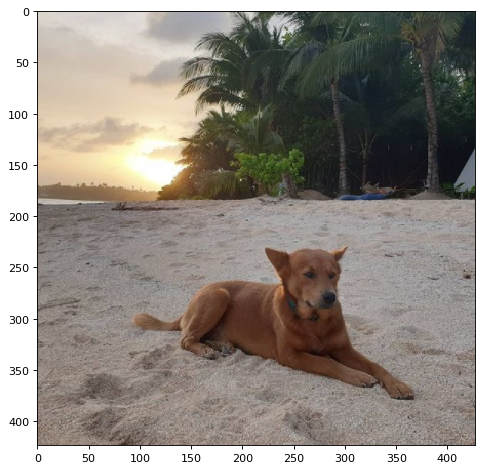

In [28]:
dog = imread('doggo.png')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(dog)

In [32]:
def image_to_pandas(image):
    df = pd.DataFrame([image[:,:,0].flatten(), image[:,:,1].flatten(), image[:,:,2].flatten()]).T
    df.columns = ["Red_Channel","Green_Channel","Blue_Channel"]
    return df
df_doggo = image_to_pandas(dog)
df_doggo.head(5)

,Red_Channel,Green_Channel,Blue_Channel
0,-41,-45,-53
1,-40,-44,-53
2,-39,-43,-52
3,-39,-43,-52
4,-39,-43,-52


/home/david.albuquerque/anaconda3/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


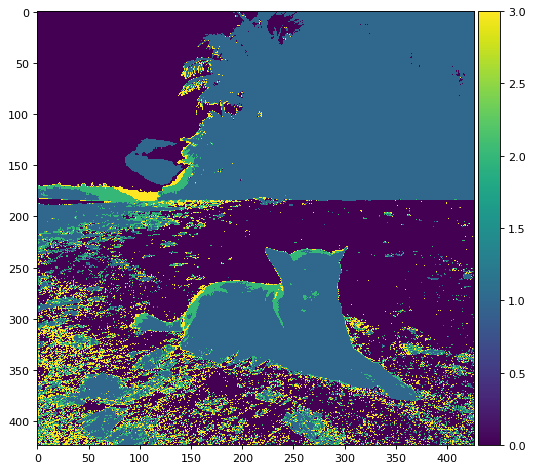

In [22]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
kmeans = KMeans(n_clusters=  4, random_state = 42).fit(df_doggo)
result = kmeans.labels_.reshape(dog.shape[0],dog.shape[1])
imshow(result, cmap='viridis')
plt.show()

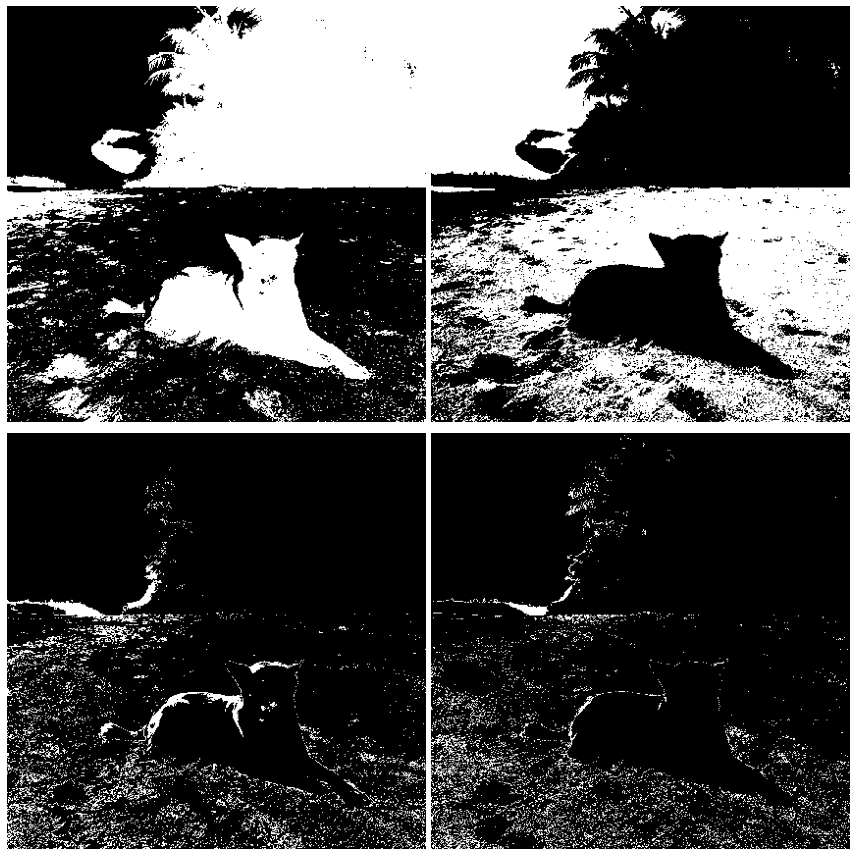

In [5]:
fig, axes = plt.subplots(2,2, figsize=(12, 12))
for n, ax in enumerate(axes.flatten()):
    ax.imshow(result==[n], cmap='gray');
    ax.set_axis_off()
    
fig.tight_layout()

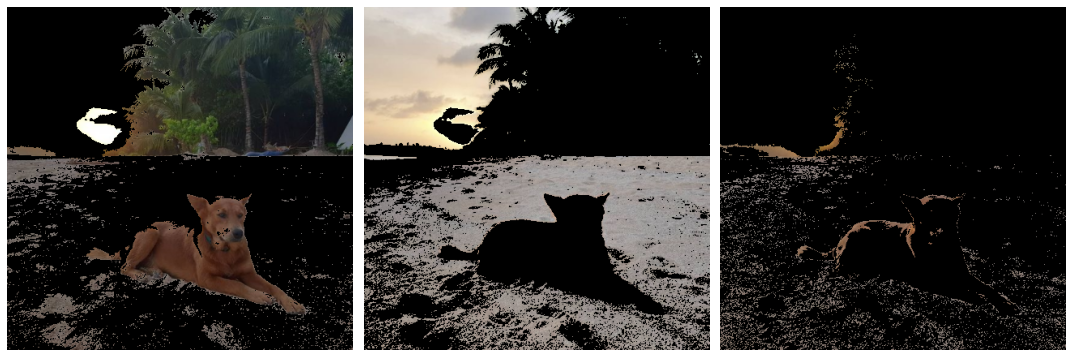

In [7]:
fig, axes = plt.subplots(1,3, figsize=(15, 12))
for n, ax in enumerate(axes.flatten()):
    dog = imread('doggo.png')
    dog[:, :, 0] = dog[:, :, 0]*(result==[n])
    dog[:, :, 1] = dog[:, :, 1]*(result==[n])
    dog[:, :, 2] = dog[:, :, 2]*(result==[n])
    ax.imshow(dog);
    ax.set_axis_off()
fig.tight_layout()

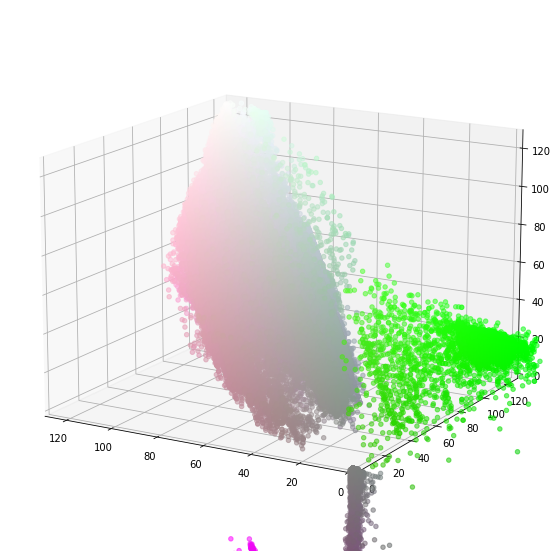

In [13]:
def pixel_plotter(df):
    x_3d = df['Red_Channel']
    y_3d = df['Green_Channel']
    z_3d = df['Blue_Channel']
    
    color_list = list(zip(df['Red_Channel'].to_list(), df['Blue_Channel'].to_list(), df['Green_Channel'].to_list()))
    norm = colors.Normalize(vmin=0,vmax=1.)
    norm.autoscale(color_list)
    p_color = norm(color_list).tolist()
    
    fig = plt.figure(figsize=(12,10))
    ax_3d = plt.axes(projection='3d')
    ax_3d.scatter3D(xs = x_3d, ys =  y_3d, zs = z_3d, c = p_color, alpha = 0.55)
    
    ax_3d.set_xlim3d(0, x_3d.max())
    ax_3d.set_ylim3d(0, y_3d.max())
    ax_3d.set_zlim3d(0, z_3d.max())
    ax_3d.invert_zaxis()
    
    
    ax_3d.view_init(-165, 60)
pixel_plotter(df_doggo)

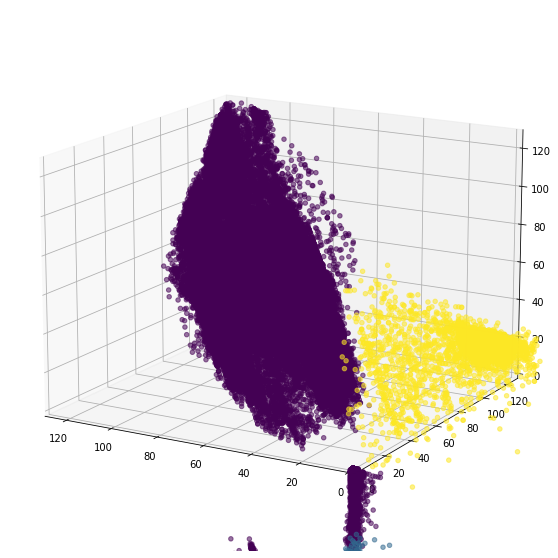

In [11]:
df_doggo['cluster'] = result.flatten()
def pixel_plotter_clusters(df):
    x_3d = df['Red_Channel']
    y_3d = df['Green_Channel']
    z_3d = df['Blue_Channel']
    
    fig = plt.figure(figsize=(12,10))
    ax_3d = plt.axes(projection='3d')
    ax_3d.scatter3D(xs = x_3d, ys =  y_3d, zs = z_3d, c = df['cluster'], alpha = 0.55)
    
    ax_3d.set_xlim3d(0, x_3d.max())
    ax_3d.set_ylim3d(0, y_3d.max())
    ax_3d.set_zlim3d(0, z_3d.max())
    ax_3d.invert_zaxis()
    
    
    ax_3d.view_init(-165, 60)
pixel_plotter_clusters(df_doggo)